In [1]:
import pickle
from jupyter_utils import jupyter_setup
jupyter_setup()
import numpy as np
import pandas as pd
from audio_processing import FeatureSet
import matplotlib.pyplot as plt
import librosa
import ipywidgets as widgets
import os
dataset_basepath = "data/Coswara_processed/pickles/"
from participant import Participant
from tqdm.notebook import tqdm

C:\Michi\acoustic_covid_detection\python


In [2]:
dataset_list = os.listdir(dataset_basepath)
# dataset_list = [dataset for dataset in dataset_list if "logmel_combined_breath" in dataset and "augmented" not in dataset]

def load_dataset(path):
    dataset_basepath = "data/Coswara_processed/pickles/"
    fullpath = os.path.join(dataset_basepath, path)
    print(fullpath)
    with open(fullpath, "rb") as f:
        return pickle.load(f)
    
dropdown = widgets.Dropdown(options=dataset_list)
# dropdown.observe(print_name, names="values")
display(dropdown)

Dropdown(options=('2022-12-08-logmel_1_channel_augmented_noBadAudio.pickle', '2022-12-08-logmel_1_channel_noAu…

In [3]:
dataset = load_dataset(dropdown.value)
print(dataset)

data/Coswara_processed/pickles/2023_02_25_logmel_combined_coughs_3s.pickle

Feature Set - #Participants: 2026
----------------------------------------------------
type_of_features:    logmel
n_time_steps:        224
n_features:          224
sample_rate:         22050
n_fft:               8192
window_length:       512
hop_size:            256
fmin:                0
fmax:                11025
hop_size_ms:         11.61
window_length_ms:    23.22
duration_seconds:    2.6
fft_res_hz:          2.69
-------------------Augmentations--------------------
----------------------------------------------------


(0.0, 25.0)

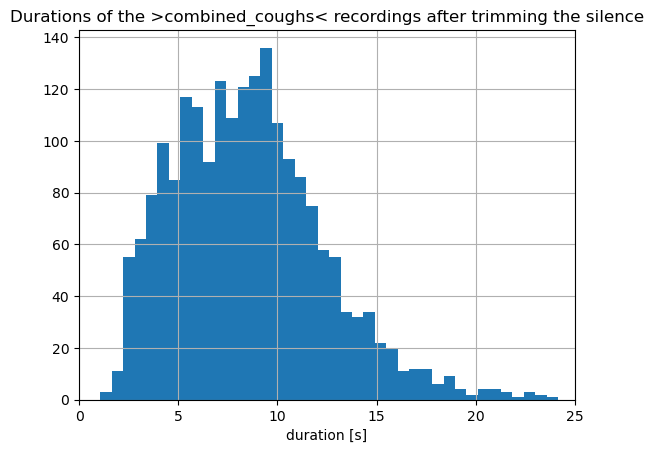

In [5]:
# plot the distribution of the durations of the recordings in the dataset
durations = [p.recordings[dataset.types_of_recording].original_duration_trimmed_silence for p in dataset.participants]
plt.hist(durations, 100), plt.title(f"Durations of the >{dataset.types_of_recording}< recordings after trimming the silence")
plt.grid(), plt.xlabel("duration [s]")
plt.xlim([0, 25])

# calculate the max amplitude of each recording

In [ ]:
amplitude_dict = {}
error_ids = []
for participant in tqdm(dataset.participants):
    try:
        rec = participant.recordings[dataset.types_of_recording].get_audio()[0]
        max_amplitude = np.absolute(rec.max())
        amplitude_dict[participant.id] = max_amplitude
    except ValueError:
        amplitude_dict[participant.id] = 0
        error_ids.append(participant.id)

(0.0, 1.0)

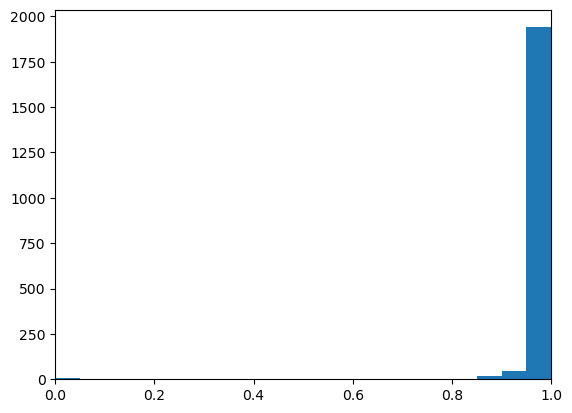

In [70]:
amplitudes = [val for key, val in amplitude_dict.items()]
plt.hist(amplitudes, 20)
plt.xlim([0, 1])

In [71]:
bad_amplitudes = [(i, participant_id, val) for i, (participant_id, val) in enumerate(amplitude_dict.items()) if val < 0.8]

In [72]:
counter = 0
a = [int(idx) for idx, _,_ in bad_amplitudes]
np.array(a)

array([ 345,  387,  412,  477,  481,  498,  507,  579,  755,  824,  830,
        870,  918,  932,  956, 1006, 1418])

In [95]:
idx = a[counter]
counter += 1
# idx = np.random.randint(1900)
print(idx)
participant = dataset.participants[idx].recordings[dataset.types_of_recording]
participant.show_waveform(30)    
# participant.play_audio()    
# participant.show_features()
user_id = dataset.participants[idx].id
print(user_id)
# relevant_df[relevant_df["user_id"] == user_id]

IndexError: list index out of range

In [91]:
participant.play_audio(30)    

Duration of the Recording: 5.69


In [96]:
bad_amplitudes

[(345, '9z2XQAVyIkb0saZVigWBr3MsDcr1', 0),
 (387, 'aImqoeTbibTbtdXNmH4F1qc3Jr43', 0.62259126),
 (412, 'aU8pLZV1OUQJV0GKeeIlgWhYWeA2', 0),
 (477, 'c18b81Qa5YY2RbEzblDNxMNQE312', 0),
 (481, 'C3luMlCgAFZqGmGjFscXe9fVHSG3', 0),
 (498, 'CdU4pgCdFcZxtDHTpLUn1mO9J3o2', 0),
 (507, 'CFwFsoyLtGUxPNPw5vMD7cznAnO2', 0.3488372),
 (579, 'dpA0EeRrtJUeKJjEuf7BL0AeTJZ2', 0),
 (755, 'gc65SjkqJYTzNMZcaT1jPkxkfyn2', 0.72884834),
 (824, 'Hb9DrqUzdCfKOQWYs4T85y3S3Rl1', 0.74206364),
 (830, 'HdJdEWQecehLzEQcyDV7vjr85C82', 0.0),
 (870, 'htQzROl26OWQpIYFDzv11F79PLR2', 0.0),
 (918, 'imhxF3UQDZNVEnNeyw8jOAsgtjv2', 0.0),
 (932, 'IS3AoZuo0cXtuYb2aDWkrIWTciP2', 0.7362243),
 (956, 'j1vkslz2yvP8MMGGhjPnZE4CVlg2', 0.0),
 (1006, 'jSb7SyucSmTHhzs3qQoBExRMQZ02', 0),
 (1418, 'qkdJKHOBuAYsKvnxbLvnoJ5Dc8y2', 0.0)]

In [110]:
idx = np.random.randint(1900)
print(idx)
participant = dataset.participants[idx].recordings[dataset.types_of_recording]

178


# Some tests regarding audio qulaity measures

(223, 258)


Text(0.5, 1.0, '2023_02_25_logmel_combined_coughs_3s.pickle')

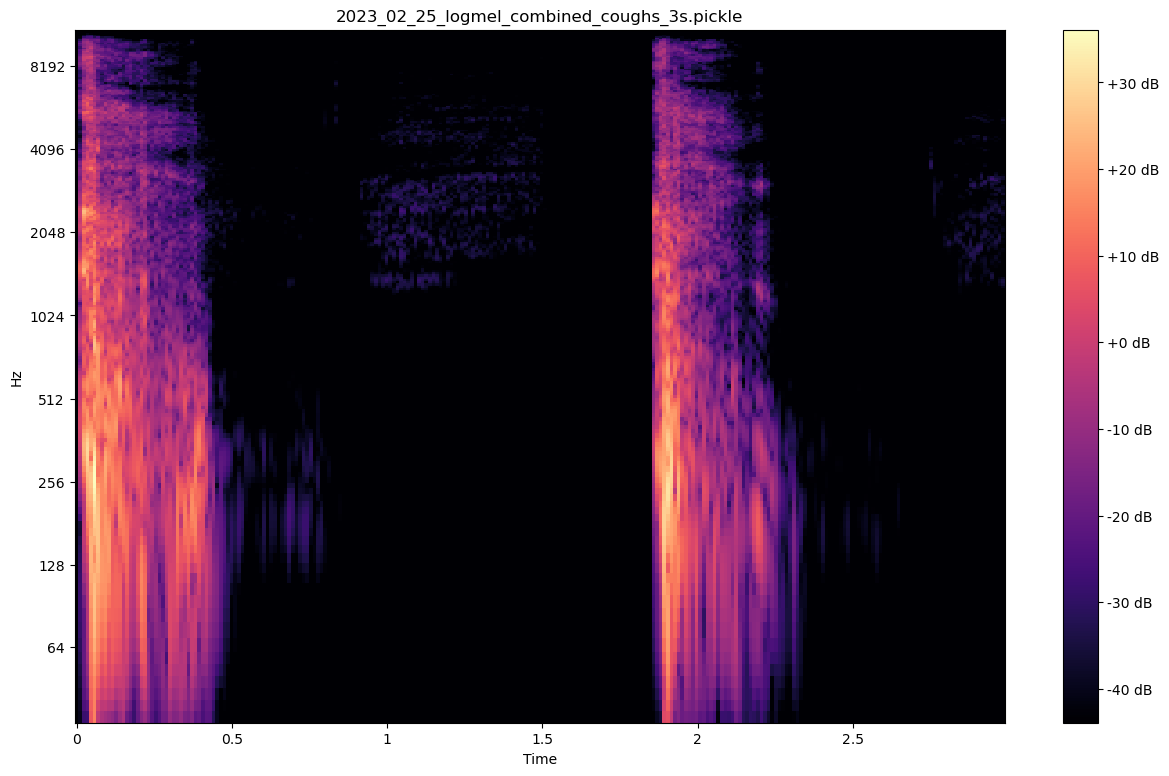

In [111]:
target_length = 3000    # in miliseconds
offset = 0              # look at the spectrogram starting at "offset" miliseconds until offset+target_length miliseconds
f = (0, 123456)       # min and max frequency to display

hopsize_ms = participant.hop_size/participant.target_sr*1000
offset_frames = int(offset // hopsize_ms)
n_frames = int(target_length // hopsize_ms)
features = participant.features
features = features[:, offset_frames:n_frames+offset_frames]
mel_frequencies = librosa.mel_frequencies(n_mels=participant.n_features, htk=True, fmin=participant.fmin, fmax=participant.fmax)
f_idx = np.logical_and(mel_frequencies > f[0], mel_frequencies < f[1])
mel_frequencies = mel_frequencies[f_idx]
features = features[f_idx]

print(features.shape)
# print(np.round(mel_frequencies))

# plt.figure()
plt.figure(figsize=(15, 9))
librosa.display.specshow(features, x_axis='time', y_axis="log", cmap="magma",
                         hop_length=participant.hop_size, sr=participant.target_sr, y_coords=mel_frequencies)
plt.colorbar(format="%+2.f dB")
plt.title(dropdown.value)

In [112]:
recording_type = "combined_coughs"
df = pd.read_csv("data/Coswara_processed/full_meta_data.csv")
bad_id_df = list(pd.read_excel(r"data/Coswara_processed/bad ids from listening and analysis.xlsx", sheet_name=recording_type, usecols=["ID"]).ID)
low_audio_quality_ids = list(df[(df["audio_quality_breathing-shallow"] == 0) | (df["audio_quality_breathing-deep"] == 0)]["user_id"])
all_bad_ids = bad_id_df+low_audio_quality_ids

ValueError: Worksheet named 'combined_coughs' not found

In [ ]:
len(dataset)

In [106]:
dataset.participants = [part for part in dataset.participants if part.id not in all_bad_ids]

In [107]:
len(dataset)

1647

In [108]:
low_audio_quality = list(df[(df["audio_quality_breathing-shallow"] == 0) | (df["audio_quality_breathing-deep"] == 0)]["user_id"])

In [109]:
len(set(low_audio_quality_ids +  bad_id_df))

678

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2746 entries, 0 to 2745
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   user_id                              2746 non-null   object 
 1   age                                  2746 non-null   int64  
 2   covid_health_status                  2746 non-null   object 
 3   record_date                          2746 non-null   object 
 4   english_proficiency                  2746 non-null   object 
 5   gender                               2746 non-null   object 
 6   country                              2746 non-null   object 
 7   local_region                         2425 non-null   object 
 8   state                                2746 non-null   object 
 9   returning_user                       2066 non-null   object 
 10  smoker                               1086 non-null   object 
 11  cold                          